# Trabajo Fin de Estudios - TFE
Master Universitario en Inteligencia Artificial

**Iván Daniel Arévalo Sánchez**
***


## Preparación de dataSets

Importación del DataSet obtenido de Facebook con técnica de Web Scraping.

In [182]:
## Importación de librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import json
import os   

from sklearn.cluster import KMeans
from sklearn import metrics

from sklearn.metrics import accuracy_score

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

**PASO 1**

Importación de DataSet, que se ha normalizado previamente desde la la lectura de información de los perfiles



In [183]:
path = 'final_data/00_json_result_scraping.json.txt'
data_facebook = pd.read_json(path , orient='values')
data_facebook



,number_friends,followers,job,joined_in,joined_in_since,live,study_actually,flag_study_actually,count_normal_words,count_emojis_caracters,name,me,friend,name_user_sub,study_finish
0,1,0,1,2011,10,0,0,0,1,0,1,1,1,1,1
1,1,0,1,0,0,0,0,0,4,20,1,1,1,1,1
2,1,0,1,0,0,1,0,0,2,7,1,1,1,1,1
3,1,0,1,2014,7,0,0,0,0,0,1,1,1,1,1
4,1117,0,1,0,0,0,0,0,2,5,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1161,4510,0,1,2018,3,0,0,0,0,0,1,1,1,1,1
1162,4998,2786,1,0,0,1,0,0,12,15,1,1,1,1,1
1163,809,0,1,0,0,1,0,0,0,0,1,1,1,1,1
1164,1,0,1,0,0,0,0,0,0,0,1,1,1,1,1


**Eliminando algunas variables que no tendrán uso en la predicción**

In [184]:
data_facebook = data_facebook.drop(['me','friend','name','name_user_sub','study_finish','study_actually','job','joined_in'], axis=1)
data_facebook

,number_friends,followers,joined_in_since,live,flag_study_actually,count_normal_words,count_emojis_caracters
0,1,0,10,0,0,1,0
1,1,0,0,0,0,4,20
2,1,0,0,1,0,2,7
3,1,0,7,0,0,0,0
4,1117,0,0,0,0,2,5
...,...,...,...,...,...,...,...
1161,4510,0,3,0,0,0,0
1162,4998,2786,0,1,0,12,15
1163,809,0,0,1,0,0,0
1164,1,0,0,0,0,0,0


**PASO 1**

Construcción del modelo con K-Means, inicialmente con valor de K = 2    

In [185]:
X = data_facebook
K_optimo = 2
model_kmeans = KMeans(n_clusters=K_optimo)
prediction = model_kmeans.fit_predict(X)


** Paso 2 **

Se grafican los resultados de la predición según las variables de entrada, se relacionan las varibles que puden aportar valor.

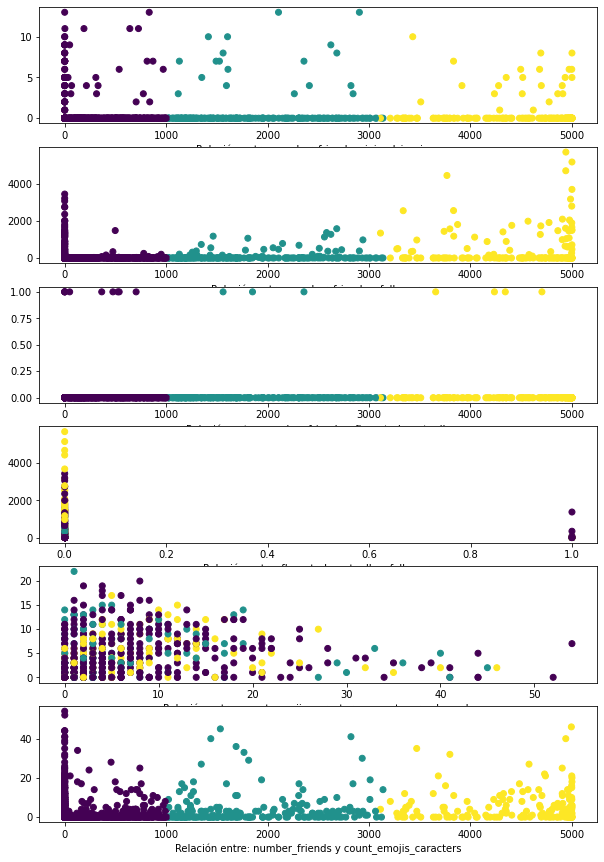

In [186]:
## Renderizado de variables, con prediccion

def renderGraphs(pred):
    
    toGraph = [
        ['number_friends', 'joined_in_since'],
        ['number_friends', 'followers'],
        ['number_friends', 'flag_study_actually'],
        ['flag_study_actually', 'followers'],
        ['count_emojis_caracters','count_normal_words'],
        ['number_friends', 'count_emojis_caracters']
    ]
    
    ## Pintar dinamicamente, los graficos necesarios
    fig, ax = plt.subplots(len(toGraph), figsize=(10, 15))
    cc = 0

    for g in toGraph:
        ax[cc].scatter(X[g[0]], X[g[1]], c=pred)
        ax[cc].set_xlabel('Relación entre: '+g[0]+' y '+g[1])
        cc = cc + 1 

    ## print scatter
    plt.show()

renderGraphs(prediction)

**Paso 3**, Calculando el mejor valor de **K**

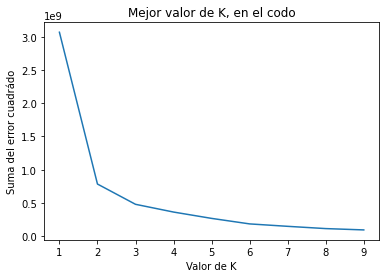

In [187]:
value_k_range = range(1,10)
sse = []

for k in value_k_range:
    model_k = KMeans(n_clusters=k)
    model_k.fit(X)
    sse.append(model_k.inertia_)


## Renderizar resultado de validacion de mejor valor de K
plt.xlabel('Valor de K')
plt.ylabel('Suma del error cuadrádo')
plt.title('Mejor valor de K, en el codo')
plt.plot(value_k_range, sse)
plt.show()

** Identificación de perfiles de acuerdo a los datos de entrada **

De acuerdo a las características en los perfiles de Facebook identificados. Se agrupan en 2 grupos, identificados como 
``` Posiblemente Válidos, y Posiblemente No Válidos ```

In [188]:
## CLASES DEFINIDAS
group = ['Grupo 1','Grupo 2','Grupo 3']

In [189]:
## Ejemplo de predicción !
## number_friends	| followers	| joined_in_since	| live	|  flag_study_actually
R = model_kmeans.predict([[10000, 500, 10,   1,   0,  5, 10]])
group[R[0]]

'Grupo 3'

** De acuerdo al aprendizaje No supervisado, y la agrupación generada **

se genera el etiquetado de estos datos, para llevarlos a un aprendizaje supervisado, en los siguientes datos que busquen determinarse en el modelo.

In [190]:
data_facebook['clasification'] = 7 # Numero base que es actualizado con la predicción


cols = ['number_friends', 'followers', 'joined_in_since','live','flag_study_actually','count_normal_words','count_emojis_caracters']

 
for i in data_facebook.index:
    array_to_prediction = []
    ## Recorrer las columnas necesrias
    for c in cols:
        array_to_prediction.append(data_facebook[c][i])
    
    ## Hacer la clasificación de acuerdo a los resultados del aprendizaje no supervisado
    r_prediction = model_kmeans.predict([array_to_prediction])

    ## Asignacion en cada fila de la columna prediction    
    data_facebook['clasification'][i] = r_prediction[0]


** Se imprime el nuevo DataSet con datos clasificados**

Le aplica el etiquetado, y posteriormente se lleva a cabo la clasificación para identificar como aprendizaje supervisado.

In [191]:
data_facebook

,number_friends,followers,joined_in_since,live,flag_study_actually,count_normal_words,count_emojis_caracters,clasification
0,1,0,10,0,0,1,0,0
1,1,0,0,0,0,4,20,0
2,1,0,0,1,0,2,7,0
3,1,0,7,0,0,0,0,0
4,1117,0,0,0,0,2,5,1
...,...,...,...,...,...,...,...,...
1161,4510,0,3,0,0,0,0,2
1162,4998,2786,0,1,0,12,15,2
1163,809,0,0,1,0,0,0,0
1164,1,0,0,0,0,0,0,0


**Construcción del modelo de aprendizaje supervisado, con un Arbol de Desición**

Se hacce uso de la librería de Sklearn,específicamente de _DecisionTreeClassifier_

In [192]:
## Se definen los conjuntos de datos de entrenamiento y de validacion
Y_facebook = data_facebook.to_numpy()
X_Data = Y_facebook[:, 0:7]
Y_Data = Y_facebook[:, 7:8]

X_train, X_test, y_train, y_test = train_test_split(X_Data, Y_Data, test_size=0.3, random_state =1)


In [193]:
## Creacion del model y entrenamiento
model_kmeans_supervise = DecisionTreeClassifier()
model_kmeans_supervise.fit(X_train, y_train)

DecisionTreeClassifier()

In [194]:
prediction = model_kmeans_supervise.predict([[2000, 1000,   0,   0,   1, 20, 15]])
print('='*50)
print(' La predicción es: '+ group[prediction[0]])
print('='*50)


 La predicción es: Grupo 2


In [195]:
# Predicciones para los datos de entrenamiento
y_pred_i = model_kmeans_supervise.predict(X_test)



In [196]:
acc = accuracy_score(y_test, y_pred_i)

print("Accuracy:", str((acc)*100)+'%')

Accuracy: 100.0%


**Grafico del Arbol de Desición**

[Text(133.92000000000002, 195.696, 'number_friends <= 1013.5\ngini = 0.478\nsamples = 816\nvalue = [560, 153, 103]\nclass = G1'),
 Text(66.96000000000001, 152.208, 'gini = 0.0\nsamples = 560\nvalue = [560, 0, 0]\nclass = G1'),
 Text(200.88000000000002, 152.208, 'number_friends <= 3206.0\ngini = 0.481\nsamples = 256\nvalue = [0, 153, 103]\nclass = G2'),
 Text(133.92000000000002, 108.72, 'number_friends <= 3093.5\ngini = 0.013\nsamples = 154\nvalue = [0, 153, 1]\nclass = G2'),
 Text(66.96000000000001, 65.232, 'gini = 0.0\nsamples = 151\nvalue = [0, 151, 0]\nclass = G2'),
 Text(200.88000000000002, 65.232, 'number_friends <= 3118.0\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]\nclass = G2'),
 Text(133.92000000000002, 21.744, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = G3'),
 Text(267.84000000000003, 21.744, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0]\nclass = G2'),
 Text(267.84000000000003, 108.72, 'gini = 0.0\nsamples = 102\nvalue = [0, 0, 102]\nclass = G3')]

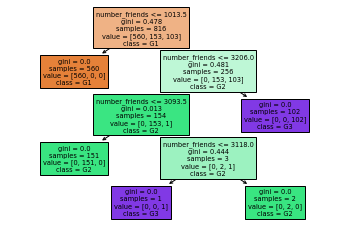

In [197]:
tree.plot_tree(model_kmeans_supervise,
    feature_names = ['number_friends','followers','joined_in_since','live','flag_study_actually','count_normal_words','count_emojis_caracters'],
    class_names= np.array(['G1','G2','G3']),
    filled=True
)

** Guardar el modelo para usarlo en servicio API **


In [65]:
import pickle

pkl_filename = "00_model_kmeans_supervise.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(model_kmeans_supervise, file)

** Prueba de uso del modelo guardado **

In [66]:

# Load from file
with open(pkl_filename, 'rb') as file:
    pickle_model = pickle.load(file)
    
## Generando una prediccion con el archivo guardado
# number_friends	followers	joined_in_since	live	flag_study_actually

rz_t = pickle_model.predict([[1900, 1000,   0,   0,   1]])
print('='*32)
print(" Resultado de un ejemplo de predicción es: " + group[rz_t[0]])
print('='*32)


 Resultado de un ejemplo de predicción es: Grupo 1


In [96]:

from sklearn import datasets

iris = datasets.load_iris()
iris.target_names
# type(iris.target_names)


# r = np.array(['G1','G2','G3'])
# r


array(['setosa', 'versicolor', 'virginica'], dtype='<U10')